In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as npb
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Read the file

In [2]:
dfLoan = pd.read_csv("loan.csv")
dfLoan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Clean-up the Null values

In [3]:
#Find null columns

print (dfLoan.shape)
print (dfLoan.isnull().sum().to_csv())

(39717, 111)
,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,2459
emp_length,1075
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0
loan_status,0
pymnt_plan,0
url,0
desc,12940
purpose,0
title,11
zip_code,0
addr_state,0
dti,0
delinq_2yrs,0
earliest_cr_line,0
inq_last_6mths,0
mths_since_last_delinq,25682
mths_since_last_record,36931
open_acc,0
pub_rec,0
revol_bal,0
revol_util,50
total_acc,0
initial_list_status,0
out_prncp,0
out_prncp_inv,0
total_pymnt,0
total_pymnt_inv,0
total_rec_prncp,0
total_rec_int,0
total_rec_late_fee,0
recoveries,0
collection_recovery_fee,0
last_pymnt_d,71
last_pymnt_amnt,0
next_pymnt_d,38577
last_credit_pull_d,2
collections_12_mths_ex_med,56
mths_since_last_major_derog,39717
policy_code,0
application_type,0
annual_inc_joint,39717
dti_joint,39717
verification_status_joint,39717
acc_now_delinq,0
tot_coll_amt,39717
tot_cur_bal,39717
open_acc_6m,39717
open_il_6m,39717
open_il_12m

In [4]:
# Remove null columns
dfLoan.dropna(axis=1,how='all',inplace=True)
dfLoan.shape

(39717, 57)

In [5]:
# remove desc, title and emp_title since free text

# Remove following since all values are same
# pymnt_plan, 
# application_type, 
# initial_list_status, 
# acc_now_delinq, 
# policy_code, 
# delinq_amnt, 
# collections_12_mths_ex_med 
# chargeoff_within_12_mths
# tax_liens
# next_pymt_dt

#Remove mths_since_last_record and mths_since_last_delinq since majority values are missing

dfLoan.drop(columns=['desc', 'emp_title', 'next_pymnt_d', 'title', 'pymnt_plan', 'application_type', 'initial_list_status', 'acc_now_delinq', 'policy_code', 'delinq_amnt', 'collections_12_mths_ex_med','chargeoff_within_12_mths', 'tax_liens', 'mths_since_last_delinq', 'mths_since_last_record'], axis=1, inplace=True)           

In [6]:
# Replace NA with 0 for mths_since_last_delinq and mths_since_last_record
#dfLoan['mths_since_last_delinq'] = dfLoan['mths_since_last_delinq'].fillna(0)
#dfLoan['mths_since_last_record'] = dfLoan['mths_since_last_record'].fillna(0)

# Replace NA with 0 for emp_length. 0 values should not be considered for analysis
dfLoan['emp_length'] = dfLoan['emp_length'].fillna(0)

#Replace NA with 0 pub_rec_bankruptcies assuming no bankruptcies since information is not available.
dfLoan['pub_rec_bankruptcies'] = dfLoan['pub_rec_bankruptcies'].fillna(0)

In [7]:
print(dfLoan.isnull().sum().to_csv())
dfLoan.shape

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0
loan_status,0
url,0
purpose,0
zip_code,0
addr_state,0
dti,0
delinq_2yrs,0
earliest_cr_line,0
inq_last_6mths,0
open_acc,0
pub_rec,0
revol_bal,0
revol_util,50
total_acc,0
out_prncp,0
out_prncp_inv,0
total_pymnt,0
total_pymnt_inv,0
total_rec_prncp,0
total_rec_int,0
total_rec_late_fee,0
recoveries,0
collection_recovery_fee,0
last_pymnt_d,71
last_pymnt_amnt,0
last_credit_pull_d,2
pub_rec_bankruptcies,0



(39717, 42)

### Check and Adjust the Data Types

In [8]:
# Convert the data into right format
# Interest Rate
dfLoan['int_rate'] = dfLoan['int_rate'].apply (lambda x: float(x.replace('%','')))

# Revol_util
dfLoan['revol_util'] = dfLoan['revol_util'].apply (lambda x: x if type(x) == float else float(x.replace('%','')))

# Annual Income
dfLoan['annual_inc'] = dfLoan['annual_inc'].astype(float)

print(dfLoan.dtypes)

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc           

### Univariate Numerical Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

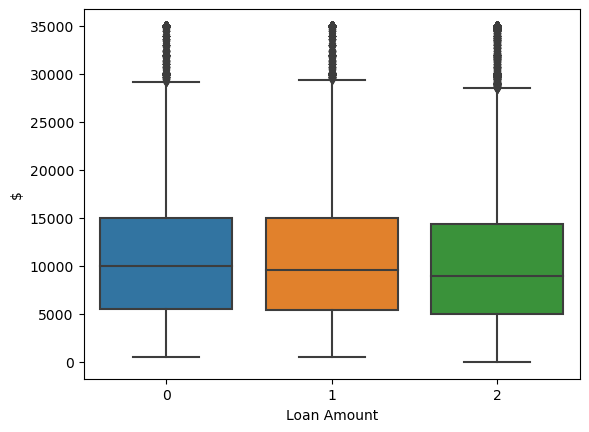

In [9]:
# Loan Amounts

sns.boxplot([dfLoan.loan_amnt, dfLoan.funded_amnt, dfLoan.funded_amnt_inv]).set(xlabel = 'Loan Amount', ylabel = '$')
plt.show

#Analysis no major difference in the 3 loan amounts and no outliers
# Loan amounts are max 35,000

<function matplotlib.pyplot.show(close=None, block=None)>

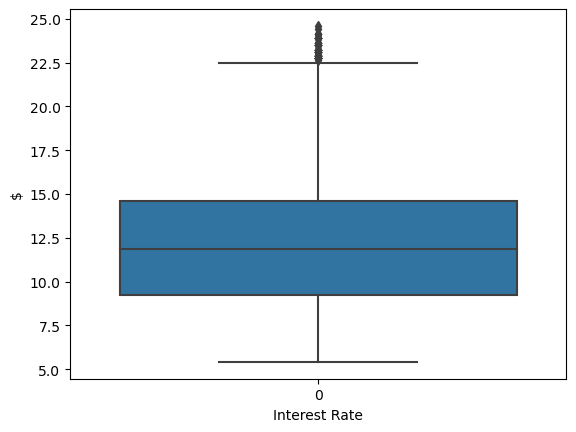

In [10]:
#Interest Rate

sns.boxplot([dfLoan.int_rate]).set(xlabel = 'Interest Rate', ylabel = '$')
plt.show

#Analysis - no outliers for interest rate

<function matplotlib.pyplot.show(close=None, block=None)>

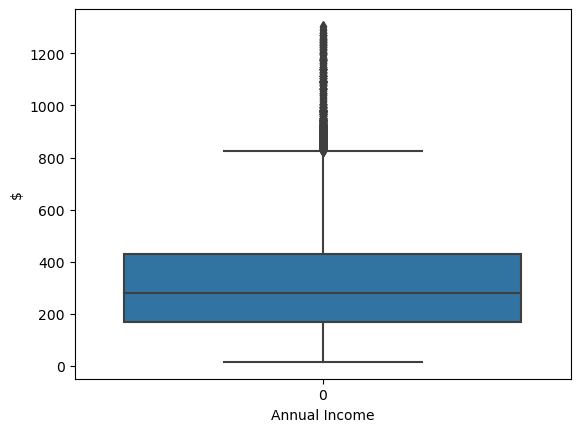

In [11]:
#Installment amount

sns.boxplot([dfLoan.installment]).set(xlabel = 'Annual Income', ylabel = '$')
plt.show

#Analysis - no outliers for installment

<function matplotlib.pyplot.show(close=None, block=None)>

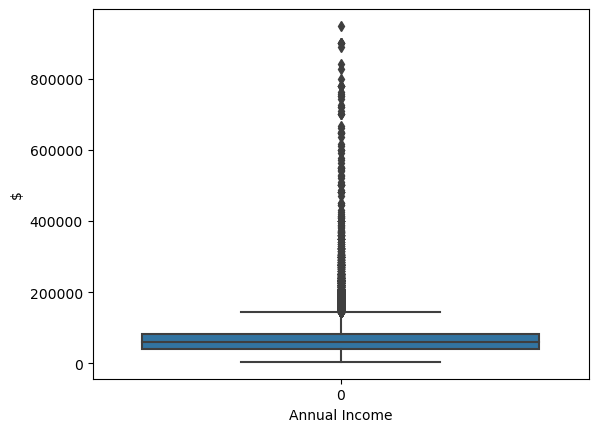

In [12]:
#Annual Income
#Analysis - There are some outliers. Remove the outliers where annual income is greater thatn 1m
dfLoan = dfLoan[dfLoan['annual_inc'] < 1000000]

sns.boxplot([dfLoan.annual_inc]).set(xlabel = 'Annual Income', ylabel = '$')
plt.show

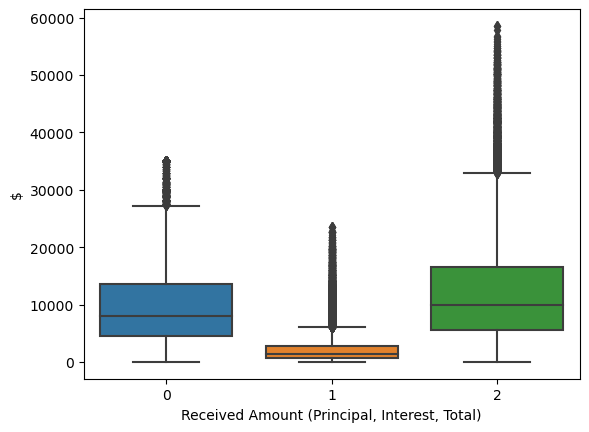

In [13]:
sns.boxplot([dfLoan.total_rec_prncp, dfLoan.total_rec_int, dfLoan.total_pymnt]).set(xlabel = "Received Amount (Principal, Interest, Total)", ylabel = '$')

plt.show()

### Univariate Ordered/Unordered Analysis

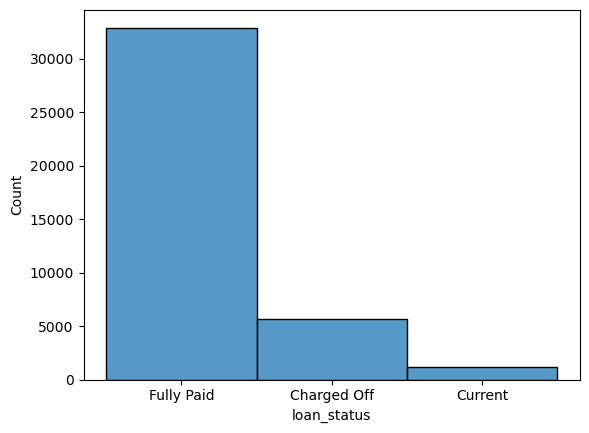

In [14]:
#status
sns.histplot(dfLoan.loan_status)
plt.show()

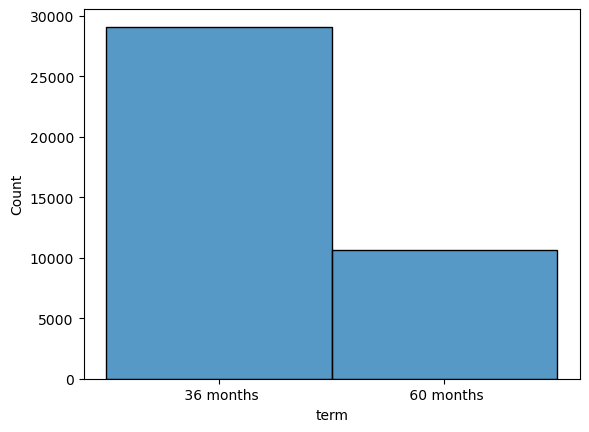

In [15]:
#Term
sns.histplot(dfLoan.term)
plt.show()

#Analysis - There are only 2 types of loans - 36 months and 60 months

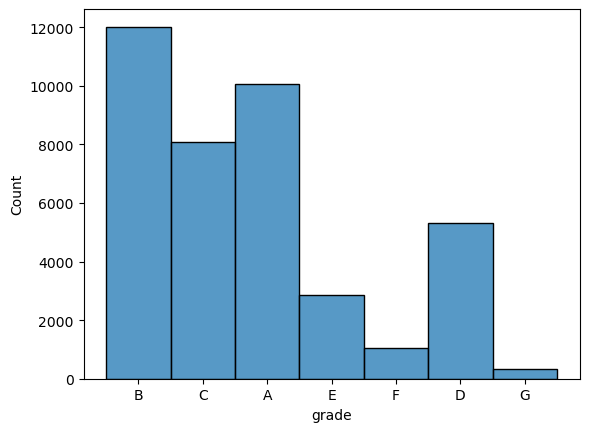

In [16]:
#grade
sns.histplot(dfLoan.grade)
plt.show()

#Analysis - Different types of grading given to the loans. Assuming A is better rating and G is the lower rating

In [17]:
#sub_grade
dfLoan.sub_grade.value_counts()


B3    2916
A4    2884
A5    2741
B5    2704
B4    2512
C1    2134
B2    2057
C2    2009
B1    1830
A3    1807
C3    1529
A2    1507
D2    1348
C4    1236
C5    1185
D3    1173
A1    1139
D4     980
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

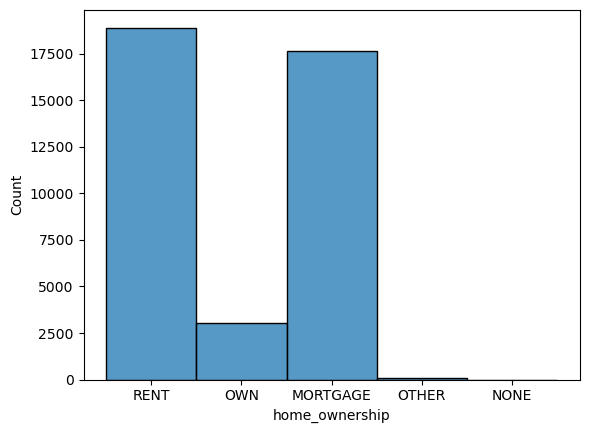

In [18]:
# home_ownership
sns.histplot(dfLoan.home_ownership)
plt.show()

#Analysis - Mainly rent, own and mortgage. Others and none are not significant

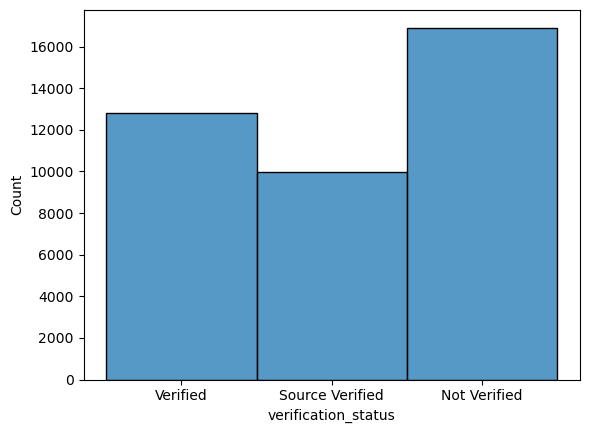

In [19]:
# verification_status
sns.histplot(dfLoan.verification_status)
plt.show()

#Analysis - 3 categories of verification status

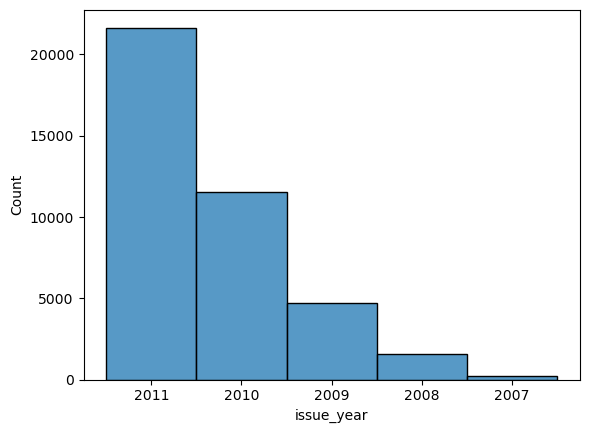

In [20]:
# Issue Date
from datetime import datetime
dfLoan['issue_year'] = dfLoan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y').strftime("%Y"))

sns.histplot(dfLoan.issue_year)
plt.show()

#Analysis - Number of loans issued are more in 2011

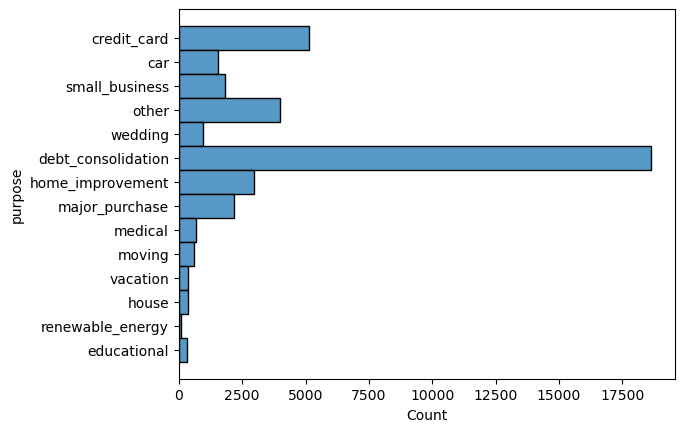

In [21]:
#application_type

sns.histplot(y=dfLoan.purpose )
plt.show()

#Analysis - Significant loan for debt consolidation and credit cards

In [22]:
#addrstate
dfLoan.addr_state.value_counts()

#Analysis - Loans distibuted across all states.

CA    7097
NY    3810
FL    2865
TX    2726
NJ    1849
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1047
AZ     879
WA     840
CO     791
NC     788
CT     750
MI     719
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     435
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     188
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [23]:
#zip_code
dfLoan.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    472
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

### Bivariate Analysis

In [24]:
#Address and loan status
# All values are in percentage of the row count

tableAddrState = pd.pivot_table(data = dfLoan, index=['addr_state'],  columns = 'loan_status', values='id', aggfunc='count', margins=True)
print (round((tableAddrState.div(tableAddrState.iloc[:,-1], axis=0)*100),1).sort_values(by='Charged Off', ascending=False))

#Analysis Nebraska (NE), Idaho (ID) can be ignored since just total count of 5. 
# Nevada (NV), Arkansas (AK), South Dakota (SD), Florida (FL), Montana (MO) are top 5 states with high default rate.
# Charge off for other states are specified in the table

loan_status  Charged Off  Current  Fully Paid    All
addr_state                                          
NE                  60.0      NaN        40.0  100.0
NV                  21.7      3.6        74.6  100.0
AK                  18.8      2.5        78.8  100.0
SD                  18.8      3.1        78.1  100.0
FL                  17.6      3.0        79.4  100.0
ID                  16.7      NaN        83.3  100.0
MO                  16.6      2.3        81.0  100.0
HI                  16.1      4.6        79.3  100.0
NM                  16.0      3.2        80.9  100.0
CA                  15.9      2.1        82.0  100.0
OR                  15.7      3.5        80.7  100.0
MD                  15.5      2.5        82.0  100.0
UT                  15.5      2.3        82.2  100.0
GA                  15.4      2.8        81.8  100.0
WA                  15.1      2.6        82.3  100.0
NJ                  15.0      3.2        81.7  100.0
NH                  14.6      2.9        82.5 

loan_status         Charged Off  Current  Fully Paid    All
purpose                                                    
small_business             26.0      4.0        70.0  100.0
renewable_energy           18.4      1.0        80.6  100.0
educational                17.2      NaN        82.8  100.0
other                      15.9      3.2        80.9  100.0
moving                     15.8      1.2        83.0  100.0
house                      15.5      3.7        80.8  100.0
medical                    15.3      1.7        83.0  100.0
debt_consolidation         14.8      3.1        82.0  100.0
All                        14.2      2.9        83.0  100.0
vacation                   13.9      1.6        84.5  100.0
home_improvement           11.7      3.4        84.9  100.0
credit_card                10.6      2.0        87.4  100.0
car                        10.3      3.2        86.4  100.0
major_purchase             10.2      1.7        88.1  100.0
wedding                    10.1      2.2

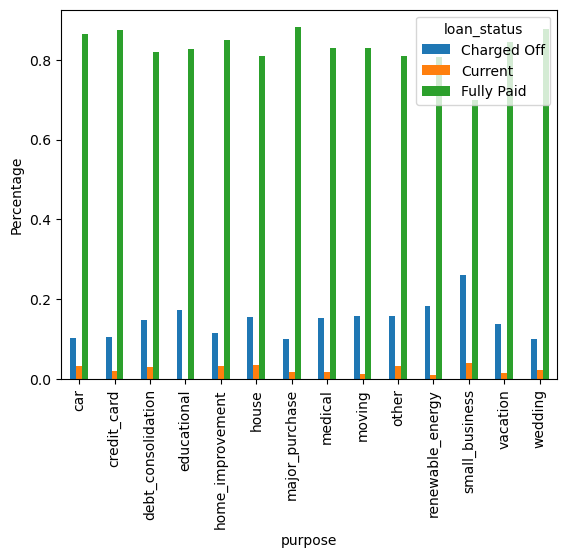

In [25]:
# Analyse the loan default basis of purpose
# All values are in percentage of the row count

tablePurpose = pd.pivot_table(data = dfLoan, index=['purpose'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tablePurposePercent = tablePurpose.div(tablePurpose.iloc[:,-1], axis=0)
print (round((tablePurposePercent*100),1).sort_values(by='Charged Off', ascending=False))
tablePurposePercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

# Analysis - small businesses have a high chance of default foollowed by renewable energy and educational

loan_status  Charged Off  Current  Fully Paid    All
term                                                
 36 months          11.1      NaN        88.9  100.0
 60 months          22.6     10.7        66.7  100.0
All                 14.2      2.9        83.0  100.0


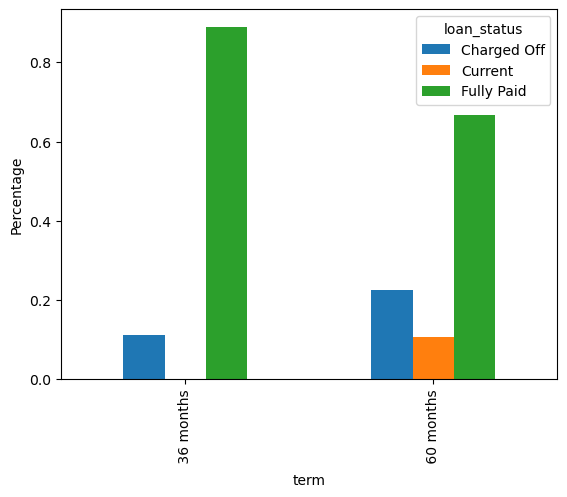

In [26]:
# Term and Loan Status
# All values are in percentage of the row count

tableTerm = pd.pivot_table(data = dfLoan, index=['term'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableTermPercent = tableTerm.div(tableTerm.iloc[:,-1], axis=0)
print (round((tableTermPercent*100),1))
tableTermPercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

#Analysis - Chances of default are higher for Term = 60 months

loan_status  Charged Off  Current  Fully Paid    All
grade                                               
G                   32.0      5.4        62.7  100.0
F                   30.4      7.0        62.6  100.0
E                   25.2      6.3        68.5  100.0
D                   21.1      4.2        74.7  100.0
C                   16.6      3.3        80.1  100.0
All                 14.2      2.9        83.0  100.0
B                   11.9      2.9        85.3  100.0
A                    6.0      0.4        93.6  100.0


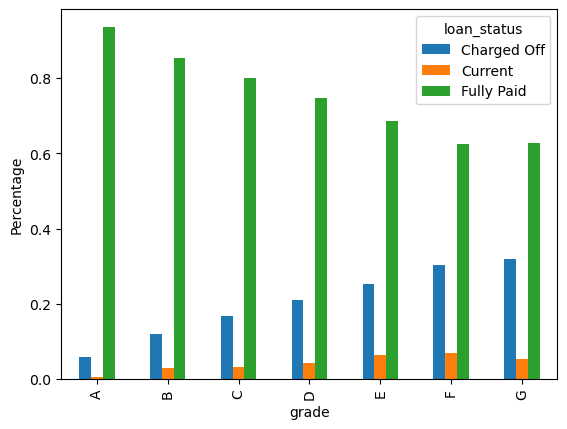

In [27]:
#grade and Loan Status
# All values are in percentage of the row count

tableGrade = pd.pivot_table(data = dfLoan, index=['grade'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableGradePercent = tableGrade.div(tableGrade.iloc[:,-1], axis=0)
print (round((tableGradePercent*100),1).sort_values(by='Charged Off', ascending=False))
tableGradePercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

# Analysis - Lower the grade, higher the chance of default

In [28]:
#sub grade and Loan Status
# All values are in percentage of the row count

tableSubGrade = pd.pivot_table(data = dfLoan, index=['sub_grade'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableSubGradePercent = tableSubGrade.div(tableSubGrade.iloc[:,-1], axis=0)
print (round((tableSubGradePercent*100),1).sort_values(by='Charged Off', ascending=False))

# Analysis - Highly correlated to the grade

loan_status  Charged Off  Current  Fully Paid    All
sub_grade                                           
F5                  45.8      4.2        50.0  100.0
G3                  39.6      6.2        54.2  100.0
G2                  35.9      1.3        62.8  100.0
G5                  33.3      3.3        63.3  100.0
F4                  31.5     10.1        58.3  100.0
G1                  29.8      9.6        60.6  100.0
F2                  28.1      6.4        65.5  100.0
E4                  27.8      6.6        65.6  100.0
F1                  27.7      7.3        65.0  100.0
F3                  27.6      5.9        66.5  100.0
E5                  26.2      7.0        66.8  100.0
E1                  26.0      5.4        68.7  100.0
E2                  24.8      6.4        68.8  100.0
D5                  23.9      4.6        71.5  100.0
G4                  23.2      3.6        73.2  100.0
D4                  21.9      6.4        71.6  100.0
D3                  21.8      4.9        73.3 

loan_status     Charged Off  Current  Fully Paid    All
home_ownership                                         
MORTGAGE               13.2      3.6        83.2  100.0
NONE                    NaN      NaN       100.0  100.0
OTHER                  18.4      NaN        81.6  100.0
OWN                    14.5      2.7        82.8  100.0
RENT                   15.0      2.2        82.8  100.0
All                    14.2      2.9        83.0  100.0


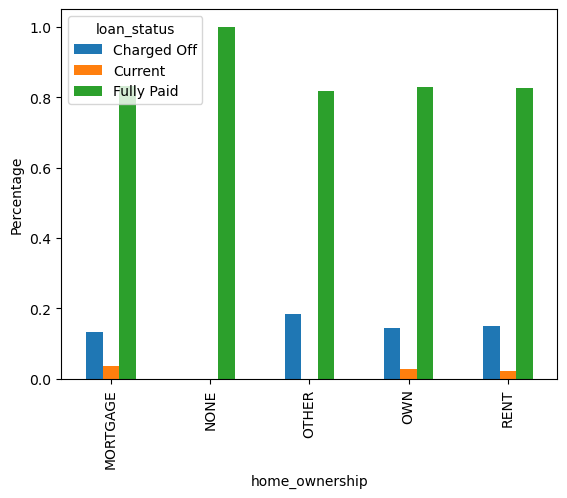

In [29]:
# home_ownership and Loan Status
# All values are in percentage of the row count

tableHO = pd.pivot_table(data = dfLoan, index=['home_ownership'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableHOPercent = tableHO.div(tableHO.iloc[:,-1], axis=0)
print (round((tableHOPercent*100),1))
tableHOPercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

# Analysis - Ignore None and Other since numbers are low as per univariate anaylsis
# Other - Other categories do not defer significantly

loan_status  Charged Off  Current  Fully Paid    All
issue_year                                          
2007                17.9      NaN        82.1  100.0
2008                15.8      NaN        84.2  100.0
2009                12.6      NaN        87.4  100.0
2010                12.9      NaN        87.1  100.0
2011                15.0      5.3        79.7  100.0
All                 14.2      2.9        83.0  100.0


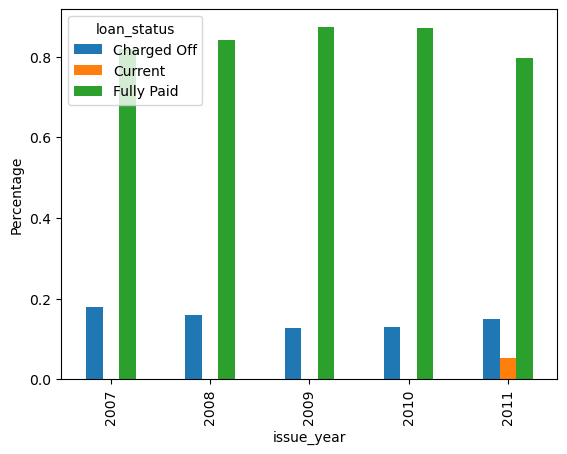

In [30]:
# Year and Loan Status
# All values are in percentage of the row count

tableYear = pd.pivot_table(data = dfLoan, index=['issue_year'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableYearPercent = tableYear.div(tableYear.iloc[:,-1], axis=0)
print (round((tableYearPercent*100),1))
tableYearPercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

#Analysis - Charge off is higher for 2007 and 2008 (Probably recession)

In [31]:
# Issue date and Loan Status
# All values are in percentage of the row count

tableIssueD = pd.pivot_table(data = dfLoan, index=['issue_d'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableIssueDPercent = tableIssueD.div(tableIssueD.iloc[:,-1], axis=0)
print (round((tableIssueDPercent*100),1).sort_values(by='Charged Off', ascending=False))

#Analysis - Nothing important can be derived

loan_status  Charged Off  Current  Fully Paid    All
issue_d                                             
Oct-07              21.3      NaN        78.7  100.0
Dec-07              21.2      NaN        78.8  100.0
Aug-07              21.2      NaN        78.8  100.0
Jul-08              20.5      NaN        79.5  100.0
Nov-07              18.9      NaN        81.1  100.0
Dec-11              18.7      9.6        71.6  100.0
Jan-08              18.1      NaN        81.9  100.0
Apr-08              17.4      NaN        82.6  100.0
May-11              17.1      4.7        78.2  100.0
Mar-08              17.0      NaN        83.0  100.0
Nov-08              16.8      NaN        83.2  100.0
Sep-07              16.7      NaN        83.3  100.0
Jun-10              16.2      NaN        83.8  100.0
Sep-10              16.1      NaN        83.9  100.0
Oct-09              16.0      NaN        84.0  100.0
Sep-08              15.6      NaN        84.4  100.0
Oct-08              15.6      NaN        84.4 

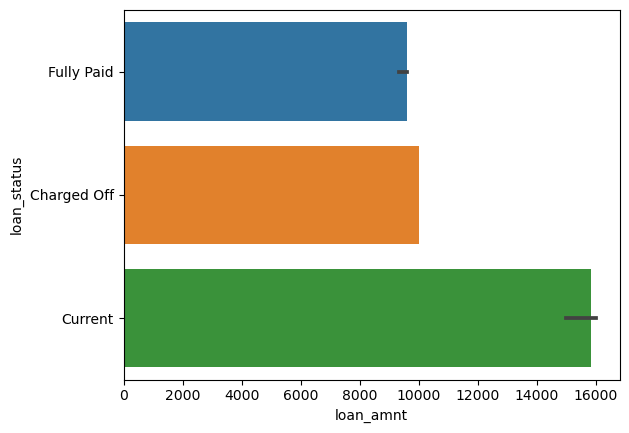

In [32]:
# Loan amount and Status

sns.barplot(data=dfLoan, x='loan_amnt', y='loan_status', estimator="median")
plt.show()

#Analysis - Higher the loan amount, potential of default is higher. However, loan amounts are less than $35,000

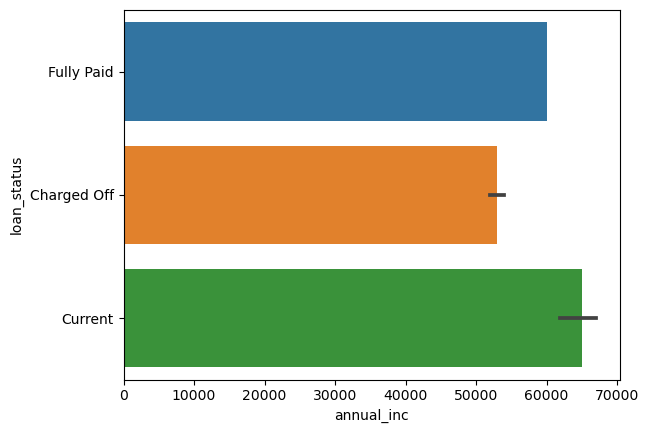

In [33]:
# Annual income and loan status

sns.barplot(data=dfLoan, x='annual_inc', y='loan_status', estimator="median")
plt.show()

#Analysis - Lower the income status, chances of charge off are higher

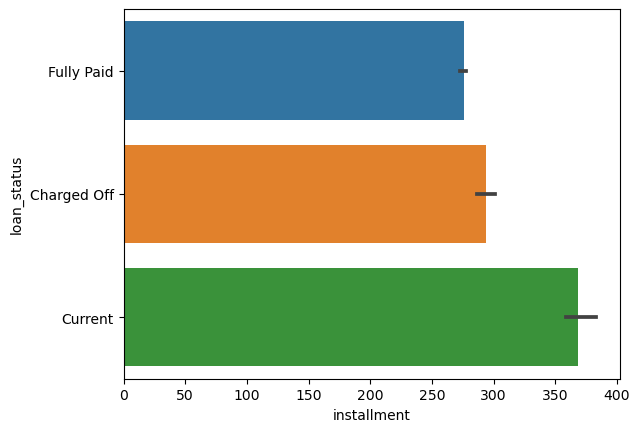

In [34]:
#Installment and Loan Status

sns.barplot(data=dfLoan, x='installment', y='loan_status', estimator="median")
plt.show()

#Analysis - Higher the installment, chances of charge off are higher

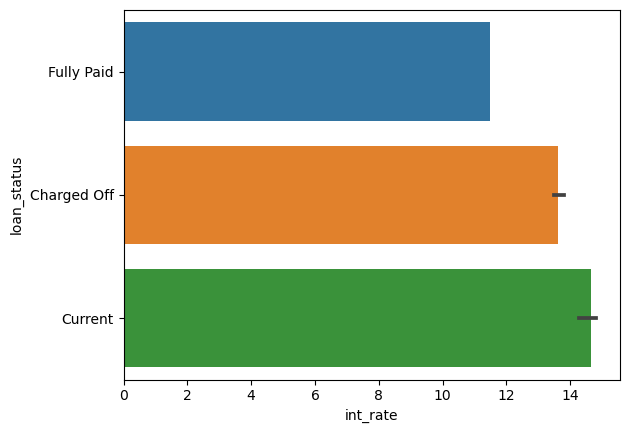

In [35]:
#Interest Rate and Loan Status

sns.barplot(data=dfLoan, x='int_rate', y='loan_status', estimator="median")
plt.show()

#Analysis - Higher the interest rate, chances of charge off are higher

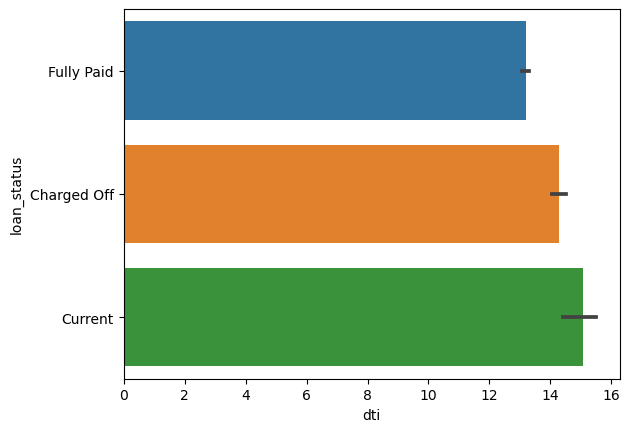

In [36]:
#dti and loan status

sns.barplot(data=dfLoan, x='dti', y='loan_status', estimator="median")
plt.show()

#Analysis - Higher the dti, chances of charge off are higher

In [37]:
#Corr between Annual Income and Interest Rate, loan amount, DTI and installment

dfLoan[['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'installment']].corr()

#Analysis - No significant correlation here.

,loan_amnt,annual_inc,int_rate,dti,installment
loan_amnt,1.000000,0.365781,0.309375,0.066378,0.930321
annual_inc,0.365781,1.000000,0.076310,-0.141611,0.368939
int_rate,0.309375,0.076310,1.000000,0.110933,0.282637
dti,0.066378,-0.141611,0.110933,1.000000,0.054032
installment,0.930321,0.368939,0.282637,0.054032,1.000000


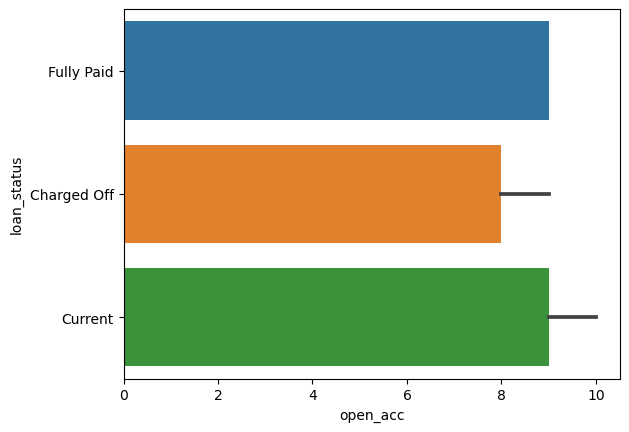

In [38]:
# Open Accounts and Loan Status
sns.barplot(data=dfLoan, x='open_acc', y='loan_status', estimator="median")
plt.show()

# Analysis - Looks like debtors are opening more lines of credit to pay off the loan

loan_status  Charged Off  Current  Fully Paid    All
pub_rec                                             
0                   13.7      2.9        83.4  100.0
1                   22.2      2.1        75.7  100.0
2                   19.6      5.9        74.5  100.0
3                    NaN      NaN       100.0  100.0
4                    NaN      NaN       100.0  100.0
All                 14.2      2.9        83.0  100.0


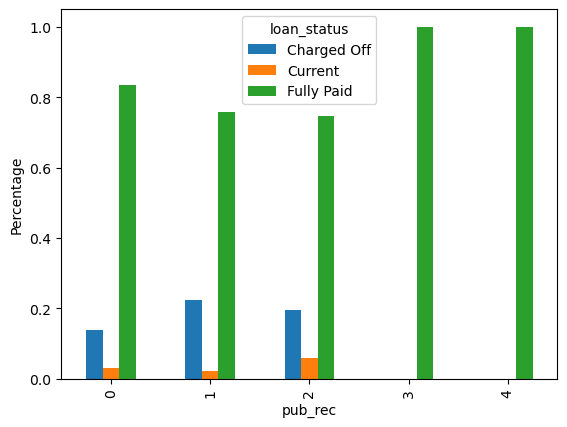

In [39]:
#pub_rec and loan status

tablePubRec = pd.pivot_table(data = dfLoan, index=['pub_rec'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tablePubRecPercent = tablePubRec.div(tablePubRec.iloc[:,-1], axis=0)
print (round((tablePubRecPercent*100),1))

tablePubRecPercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

#Analysis - If any derogatory public records, chances are higher for a default

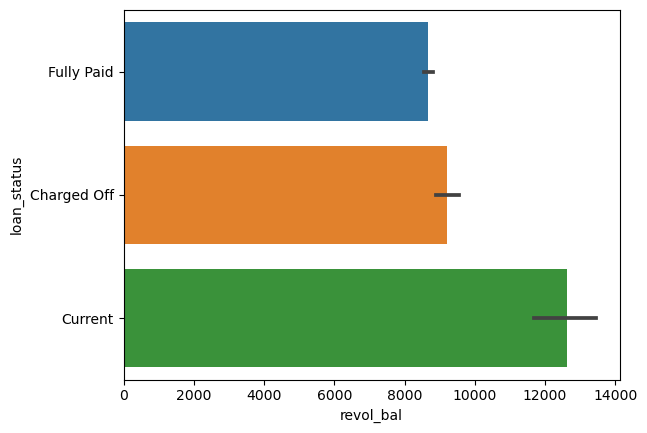

In [40]:
#Revolving balance and loan status

sns.barplot(data=dfLoan, x='revol_bal', y='loan_status', estimator="median")
plt.show()

#Analysis - Debtors with higher revolving balance are likely to default

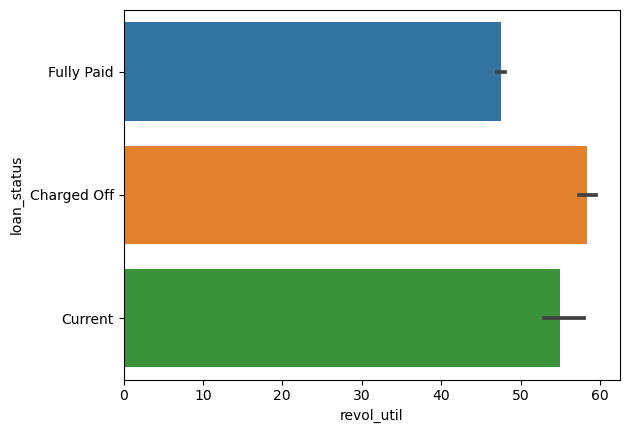

In [41]:
#Revolving utilization and loan status

sns.barplot(data=dfLoan, x='revol_util', y='loan_status', estimator="median")
plt.show()

#Analysis - Higher the revolving utilization, hight the chance of default

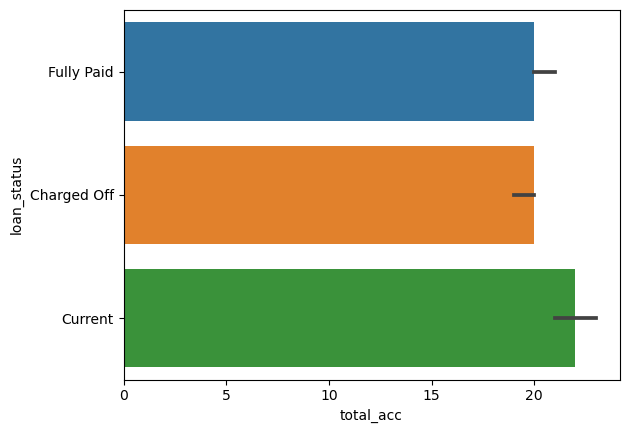

In [42]:
#total account and loan status

sns.barplot(data=dfLoan, x='total_acc', y='loan_status', estimator="median")
plt.show()

# Analysis - No major insight into defaulting based on total accounts

loan_status  Charged Off  Current  Fully Paid    All
emp_length                                          
0                   21.2      3.9        74.9  100.0
10+ years           15.0      4.4        80.6  100.0
7 years             14.8      3.5        81.7  100.0
All                 14.2      2.9        83.0  100.0
1 year              14.1      2.2        83.7  100.0
5 years             14.0      2.7        83.4  100.0
< 1 year            13.9      1.6        84.4  100.0
6 years             13.8      2.7        83.5  100.0
8 years             13.7      3.0        83.3  100.0
3 years             13.6      2.0        84.4  100.0
4 years             13.4      2.7        83.8  100.0
2 years             12.9      2.2        84.9  100.0
9 years             12.6      2.5        84.9  100.0


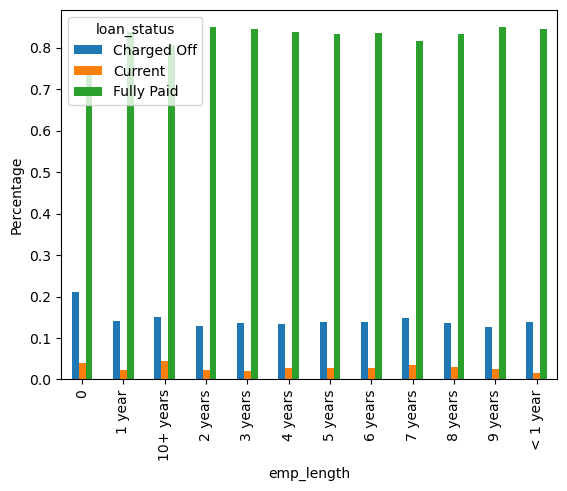

In [43]:
#Emp length and loan Status

tableEmpLength = pd.pivot_table(data = dfLoan, index=['emp_length'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableEmpLengthPercent = tableEmpLength.div(tableEmpLength.iloc[:,-1], axis=0)
print (round((tableEmpLengthPercent*100),1).sort_values(by='Charged Off', ascending=False))

tableEmpLengthPercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

# Analysis - No major insight into defaulting based on length of employment. Ignore the '0' values since they are manually filled for NA

loan_status  Charged Off  Current  Fully Paid    All
inquiry                                             
1                   16.4      2.7        80.9  100.0
All                 14.2      2.9        83.0  100.0
0                   11.8      3.1        85.1  100.0


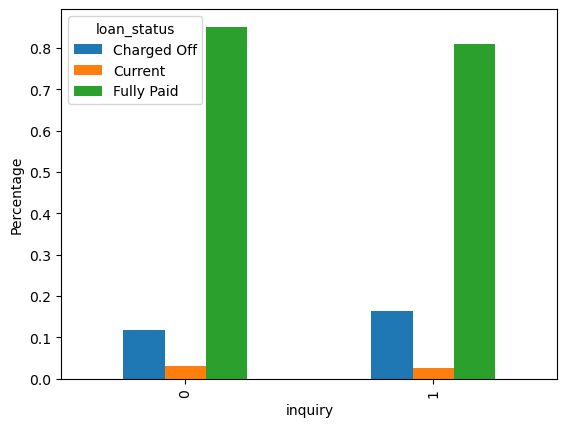

In [44]:
# inq_last_6mths and loan status

# Create a derived metric; 0 if no inquiry and 1 if inquiry
dfLoan["inquiry"] = dfLoan['inq_last_6mths'].apply (lambda x: 0 if x == 0 else 1)

tableInq = pd.pivot_table(data = dfLoan, index=['inquiry'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableInqPercent = tableInq.div(tableInq.iloc[:,-1], axis=0)
print (round((tableInqPercent*100),1).sort_values(by='Charged Off', ascending=False))

tableInqPercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

#Analysis - If there is an inquiry, changes of defaulting are higher

loan_status  Charged Off  Current  Fully Paid    All
delinq                                              
1                   16.0      2.8        81.2  100.0
All                 14.2      2.9        83.0  100.0
0                   13.9      2.9        83.2  100.0


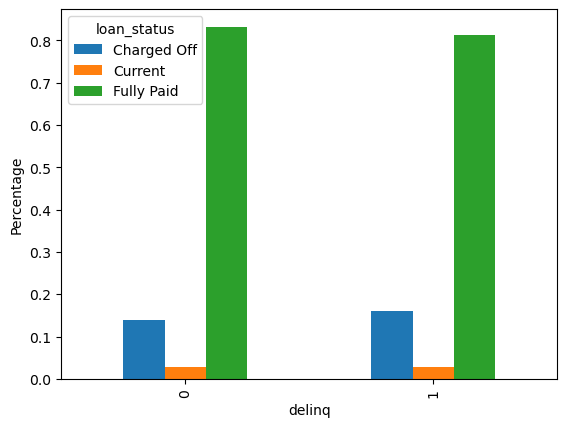

In [45]:
# delinquincy in last 2 years and loan status

# Create a derived metric; 0 if no inquiry and 1 if inquiry
dfLoan["delinq"] = dfLoan['delinq_2yrs'].apply (lambda x: 0 if x == 0 else 1)

tableDelinq = pd.pivot_table(data = dfLoan, index=['delinq'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableDelinqPercent = tableDelinq.div(tableDelinq.iloc[:,-1], axis=0)
print (round((tableDelinqPercent*100),1).sort_values(by='Charged Off', ascending=False))

tableDelinqPercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

#Analysis - If there is an deliquincy, changes of defaulting are slightly higher

loan_status           Charged Off  Current  Fully Paid    All
pub_rec_bankruptcies                                         
2.0                          28.6     28.6        42.9  100.0
1.0                          21.9      2.2        75.9  100.0
All                          14.2      2.9        83.0  100.0
0.0                          13.8      2.9        83.3  100.0


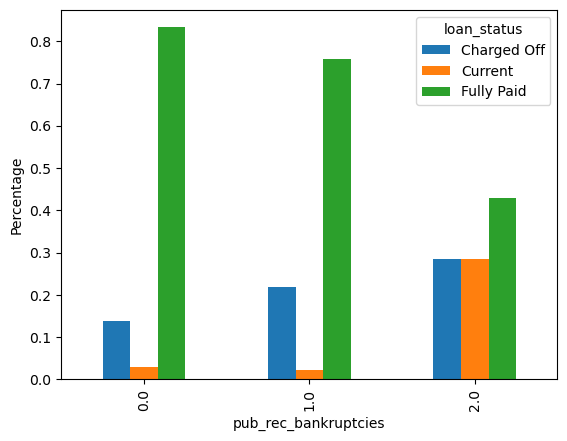

In [46]:
# pub_rec_bankruptcies and loan status

tableBankrupt = pd.pivot_table(data = dfLoan, index=['pub_rec_bankruptcies'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableBankruptPercent = tableBankrupt.div(tableBankrupt.iloc[:,-1], axis=0)
print (round((tableBankruptPercent*100),1).sort_values(by='Charged Off', ascending=False))

tableBankruptPercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

In [47]:
# Earliest Credit Line
dfLoan['early_credit_line_year'] = dfLoan['earliest_cr_line'].apply(lambda x: datetime.strptime(x, '%b-%y').strftime("%Y"))


In [48]:
# Earliest Credit Line and Loan Status

tableEarlyCreditLineYear = pd.pivot_table(data = dfLoan, index=['early_credit_line_year'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableEarlyCreditLineYearPercent = tableEarlyCreditLineYear.div(tableEarlyCreditLineYear.iloc[:,-1], axis=0)
print (round((tableEarlyCreditLineYearPercent*100),1).sort_values(by='Charged Off', ascending=False))

#Analysis - Ignoring the future years, the chances of default are if earliest credit line was from 2005 to 2008 (probably due to recession years)

loan_status             Charged Off  Current  Fully Paid    All
early_credit_line_year                                         
2062                           40.0      NaN        60.0  100.0
2067                           27.8      NaN        72.2  100.0
2068                           25.0      5.0        70.0  100.0
2007                           20.2      2.0        77.8  100.0
2006                           19.2      1.3        79.6  100.0
1979                           18.8      4.8        76.4  100.0
1973                           18.2      7.6        74.2  100.0
2066                           18.2      NaN        81.8  100.0
2008                           17.6      3.8        78.6  100.0
2005                           16.0      1.7        82.3  100.0
1983                           15.7      4.7        79.5  100.0
2000                           15.4      2.8        81.8  100.0
1997                           15.2      2.8        82.0  100.0
1972                           15.1     

loan_status          Charged Off  Current  Fully Paid    All
verification_status                                         
Verified                    16.0      4.7        79.3  100.0
Source Verified             14.4      3.1        82.5  100.0
All                         14.2      2.9        83.0  100.0
Not Verified                12.7      1.3        86.0  100.0


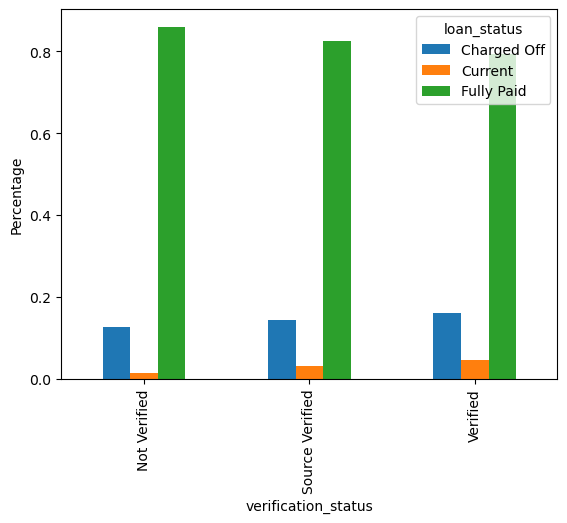

In [49]:
#verification_status

tableVerifyStatus = pd.pivot_table(data = dfLoan, index=['verification_status'],  columns = 'loan_status', values='id', aggfunc='count', margins=True) 
tableVerifyStatusPercent = tableVerifyStatus.div(tableVerifyStatus.iloc[:,-1], axis=0)
print (round((tableVerifyStatusPercent*100),1).sort_values(by='Charged Off', ascending=False))

tableVerifyStatusPercent.iloc[0:-1,0:-1].plot(kind='bar')
plt.ylabel ('Percentage')
plt.show()

#Analysis - Nothing signficant from the chart. In fact the ones where income is not verified have lower default

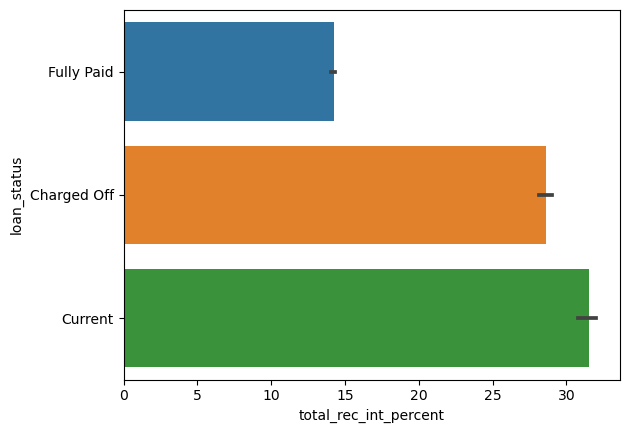

In [50]:
# total_rec_int 

# Derived metric on received interest as a percentage of total amount
dfLoan['total_rec_int_percent'] = dfLoan['total_rec_int']/dfLoan['total_pymnt'] * 100

sns.barplot(data=dfLoan, x='total_rec_int_percent', y='loan_status', estimator="median")
plt.show()

#Analysis: People under default are paying more interest